# Classification of Intel image dataset with AlexNet
Intel image dataset consist of images of Natural Scenes around the world. The data contains around 25k images of size 150x150 distributed under 6 categories: buildings, forest, glacier, mountain, sea, street.

AlexNet is the a convolutional neural network (CNN) architecture, designed by Alex Krizhevsky in collaboration with Ilya Sutskever and Geoffrey Hinton. Initially, AlexNet was built to perform multiclass image classification on ImageNet dataset where it acheived 83.6% accuracy rate. You can find the paper [here](https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf).

##### In this notebook classification of images using AlexNet architecture will be performed.


## Table of Content

- [1 - Packages](#1)
- [2 - Preprocessing and splitting data into Train and Test](#2)
- [3 - Creating AlexNet model](#3)
- [4 - Training the model](#4)
- [5 - Making Predictions](#5)
- [6 - Analysing results](#6)

<a name='1'></a>
## 1 - Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Conv2D, MaxPool2D, Activation, Flatten, Dropout

In [2]:
############################################## TODO List ##############################################
# Prepare and Preprocess data +
# Create the model +
# Train and Test model +
# Early stopping
# Improve the performance
#######################################################################################################

<a name='2'></a>
## 2 - Preprocessing and splitting data into Train and Test

In [7]:
# Preprocessing images
CATEGORIES = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

def preprocess(directory, img_size, categories):
    label = 0
    X = []
    Y = []
      
    for category in categories:
        path = os.path.join(directory, category)
        for img in os.listdir(path):
            # Reading and standartizing images
            tensor = cv2.imread(os.path.join(path, img))
            tensor = cv2.resize(tensor, (img_size, img_size))
            tensor = tf.image.per_image_standardization(tensor)
            X.append(tensor)
            # Creating Y dataset
            dummy = np.zeros((6))
            dummy[label] = 1
            Y.append(dummy)
        label +=1
    
    return X, Y


# Preparing test, train dataset 
TRAIN_DIRECTORY = 'Data/seg_train'
TEST_DIRECTORY = 'Data/seg_test'

train_X, train_Y = preprocess(TRAIN_DIRECTORY, 150, CATEGORIES)
test_X, test_Y = preprocess(TEST_DIRECTORY, 150, CATEGORIES)

train_X = np.array(train_X)/255
train_Y = np.array(train_Y)
test_X = np.array(test_X)/255
test_Y = np.array(test_Y)

In [8]:
# Shapes of train and test
print("Train X shape: ", train_X.shape, "\nTest X shape: ", test_X.shape, "\nTrain Y shape: ", train_Y.shape, "\nTest Y shape: ", test_Y.shape)

Train X shape:  (14034, 150, 150, 3) 
Test X shape:  (3000, 150, 150, 3) 
Train Y shape:  (14034, 6) 
Test Y shape:  (3000, 6)


<a name='3'></a>
## 3 - Creating AlexNet model

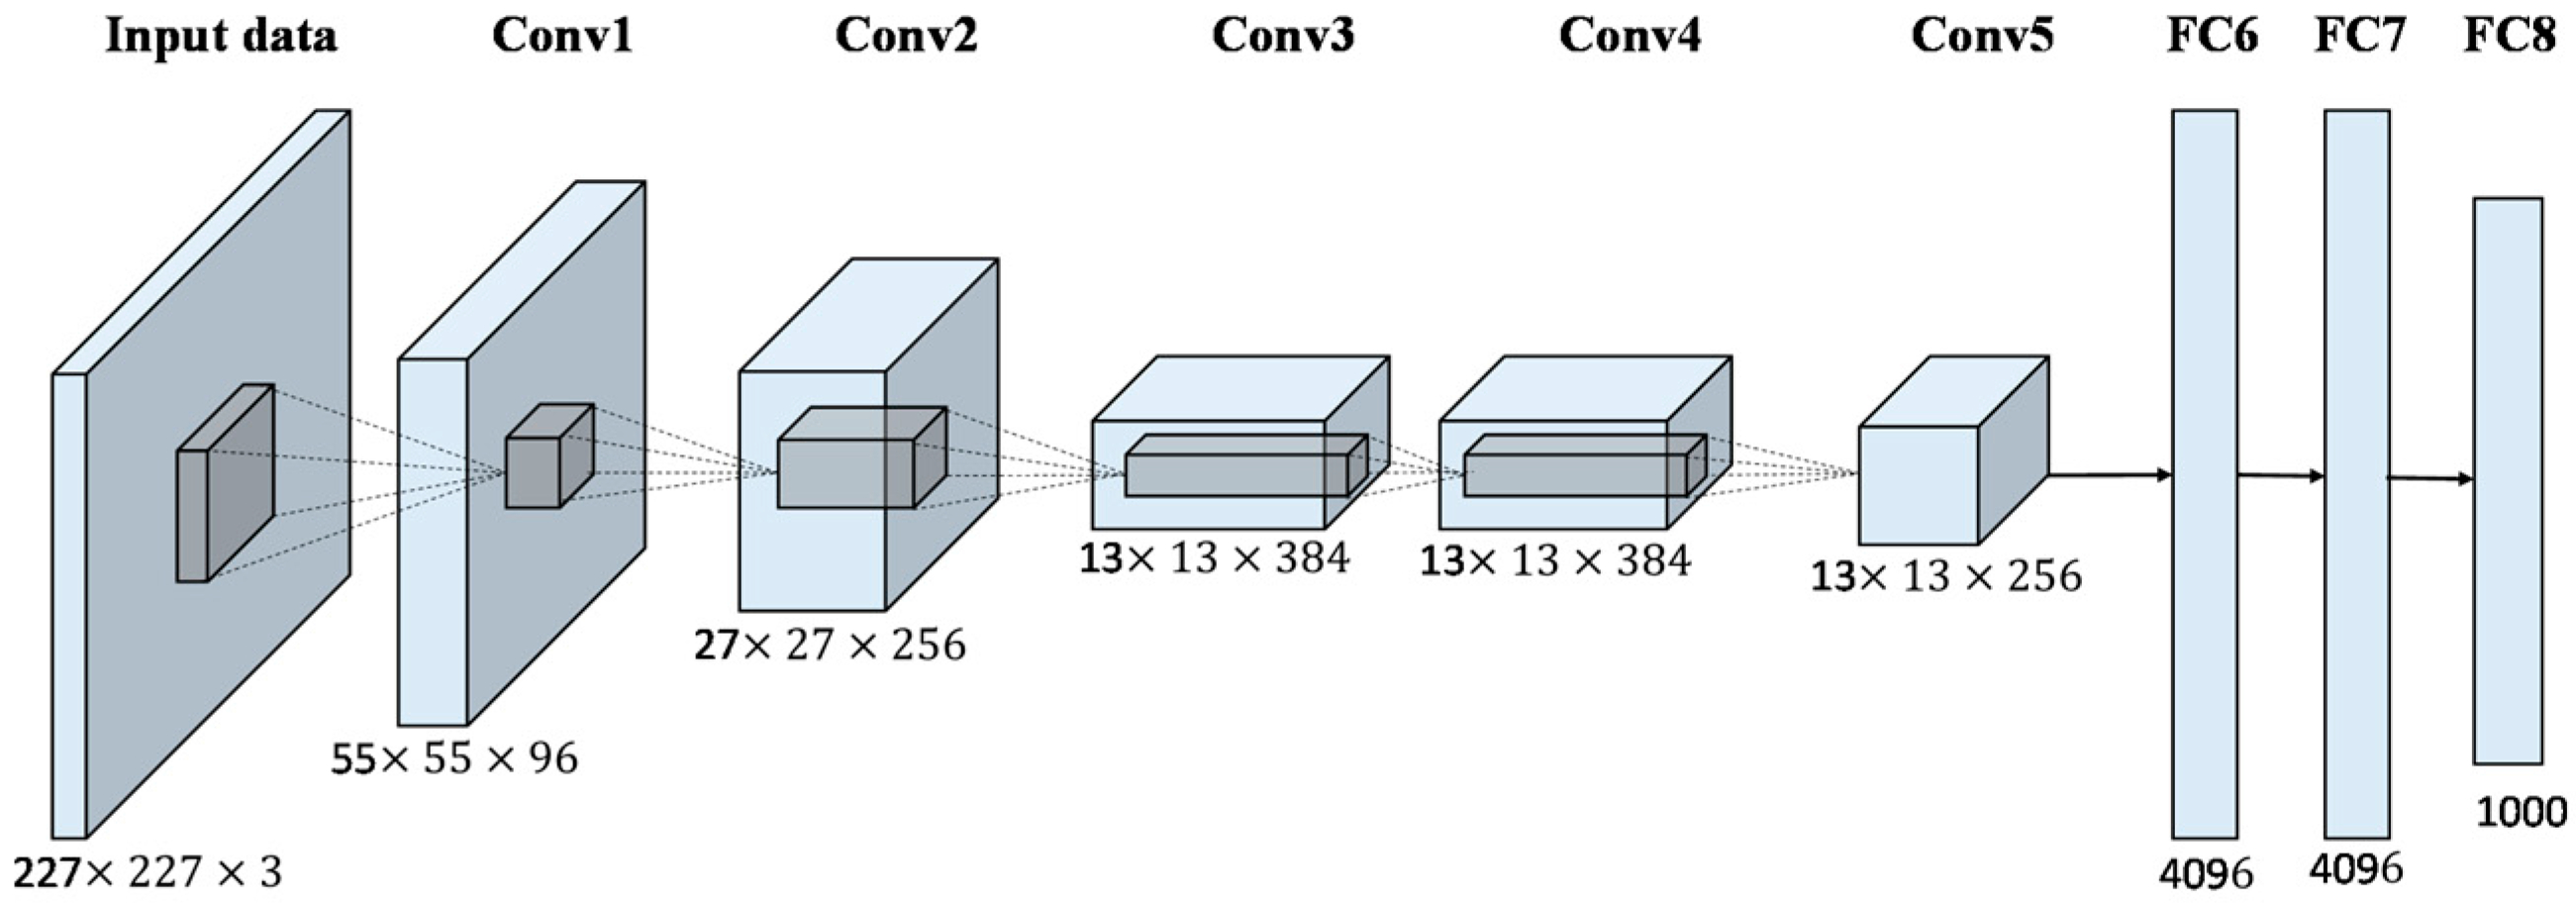

(The model in this photo represent AlexNet used for ImageNet classification, thus, dimentions are not correct.)

In [9]:
# Creating AlexNet network
def model(input_shape):
    model = keras.Sequential()

    # Layer 1
    model.add(Conv2D(96, (11, 11), strides=4, input_shape = input_shape))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(3, 3), strides=2))

    # Layer 2
    model.add(Conv2D(256, (5, 5), strides=1, padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(3, 3), strides=2))

    # Layer 3, 4, and 5
    model.add(Conv2D(384, (3, 3), strides=1, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(384, (3, 3), strides=1, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(256, (3, 3), strides=1, padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(3, 3), strides=2))

    # Layer 6
    model.add(Flatten())
    model.add(Dense(4096))
    model.add(Activation('relu'))

    # Layer 7
    model.add(Dropout(0.5))
    model.add(Dense(4096))
    model.add(Activation('relu'))

    # Layer 8
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax'))

    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt,
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
    
    return model

model = model((150, 150, 3))

In [117]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 35, 35, 96)        34944     
                                                                 
 activation_7 (Activation)   (None, 35, 35, 96)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 17, 17, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 17, 17, 256)       614656    
                                                                 
 activation_8 (Activation)   (None, 17, 17, 256)       0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                  

<a name='4'></a>
## 4 - Training the model

In [26]:
# Training and saving the model
history = model.fit(train_X, train_Y, batch_size=32, epochs=20, verbose=1, validation_data=(test_X, test_Y), shuffle=True)
model.save('AlexNet_model')

Epoch 1/20
439/439 [==============================] - 579s 1s/step - loss: 0.7856 - accuracy: 0.7062 - val_loss: 0.7592 - val_accuracy: 0.7190
Epoch 2/20
439/439 [==============================] - 521s 1s/step - loss: 0.6704 - accuracy: 0.7572 - val_loss: 0.6281 - val_accuracy: 0.7700
Epoch 3/20
439/439 [==============================] - 464s 1s/step - loss: 0.6063 - accuracy: 0.7815 - val_loss: 0.5698 - val_accuracy: 0.7970
Epoch 4/20
439/439 [==============================] - 454s 1s/step - loss: 0.5489 - accuracy: 0.8033 - val_loss: 0.5502 - val_accuracy: 0.8107
Epoch 5/20
439/439 [==============================] - 421s 959ms/step - loss: 0.4827 - accuracy: 0.8306 - val_loss: 0.5097 - val_accuracy: 0.8197
Epoch 6/20
439/439 [==============================] - 416s 948ms/step - loss: 0.4554 - accuracy: 0.8373 - val_loss: 0.5737 - val_accuracy: 0.8087
Epoch 7/20
439/439 [==============================] - 413s 941ms/step - loss: 0.4159 - accuracy: 0.8546 - val_loss: 0.4325 - val_accurac

<a name='5'></a>
## 5 - Making Predictions

In [15]:
# Loading the trained data
pretrained_model = keras.models.load_model('AlexNet_model')

1/1 [==============================] - 0s 35ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


This is an image of: buildings


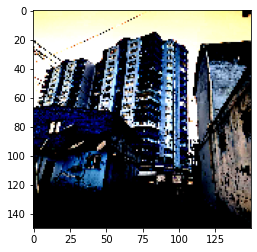

In [23]:
# Test image
photo = 'Data/arif2.jpg'

# Preprocessing image
pred_img = cv2.imread(photo)
pred_img = cv2.resize(pred_img, (150, 150))
pred_img = tf.image.per_image_standardization(pred_img)
pred_img = np.array(pred_img)/255
pred_data = pred_img.reshape((1,150,150,3))

# Predicting the image class
prediction = pretrained_model.predict(pred_data)
plt.imshow(pred_img*255)
print("This is an image of:", CATEGORIES[np.argmax(prediction)])

<a name='6'></a>
## 6 - Analysing results

After training, 95% train accuracy and 85% validation scores were obtained. Although 85% is a satisfactory result, it is obvious that data is overfitting which can be easily observed from plots below. In future, early stopping will be performed to solve overfitting.

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

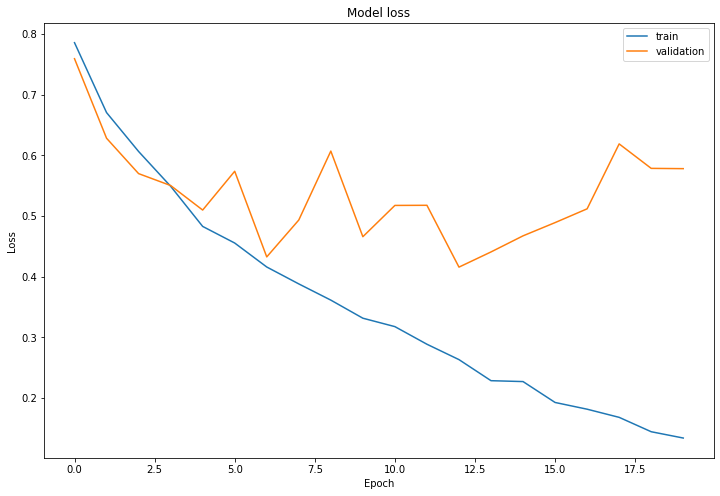

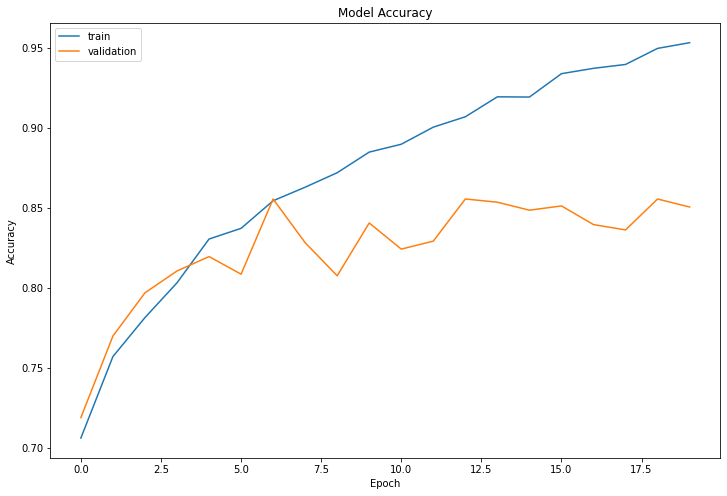

In [28]:
# Plotting loss and accuracy
import warnings
warnings.filterwarnings('ignore')
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

# Fin.